## <font color='green' size=6><p style='text-align: center;'>**Cuaderno tercer corte**

<font color='black' size=5><p style='text-align: center;'>**Yilber Niyer Cárdenas Flores- 2162167**


<font color='red' size=6><p style='text-align: justify;'>**Ejercicio 1, Regresión Lineal**

Hacer una curva de calibración con resultados de desviación a partir del archivo de timol

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sio

In [247]:
Timol= pd.read_excel('./Datos/Datos-azul-timol.xlsx', header=None, usecols=[1,3,5], nrows=20)
Timol

,1,3,5
0,NaN,NaN,NaN
1,Absorbancia,Absorbancia,Absorbancia
2,0.002,0.002,0.002
3,0.1,0.09,0.089
4,0,0,-0.001
5,0.276,0.267,0.267
6,-0.001,-0.001,-0.002
7,0.484,0.482,0.483
8,-0.001,0.001,0.001
9,0.674,0.66,0.659


In [248]:
Timol1=Timol.drop([0, 1, 4, 6, 8, 12, 10, 14, 16, 18 ])
Timol1

,1,3,5
2,0.002,0.002,0.002
3,0.1,0.09,0.089
5,0.276,0.267,0.267
7,0.484,0.482,0.483
9,0.674,0.66,0.659
11,0.877,0.877,0.877
13,1.042,1.04,1.04
15,1.267,1.267,1.266
17,1.479,1.478,1.477
19,1.644,1.64,1.688


In [272]:
Timol_des=np.std(Timol1, axis=1)
Timol_des1=Timol_des*3
Timol_desviacion={'desviación':Timol_des1}
Timol_desviacion=pd.DataFrame(Timol_desviacion, columns=['desviación'])
Timol_desviacion

,desviación
2,0.000000e+00
3,1.489966e-02
5,1.272792e-02
7,2.449490e-03
9,2.054264e-02
11,3.330669e-16
13,2.828427e-03
15,1.414214e-03
17,2.449490e-03
19,6.523803e-02


In [263]:
Timol_Prom1=Timol1.mean(axis=1)
prom={'promedio réplicas':Timol_Prom1, 'Concentración' :[0, 0.000003475, 0.000010425, 0.000017375, 0.000024325, 0.000031275, 0.000038225, 0.000045175, 0.000051125, 0.000059075]}
prom=pd.DataFrame(prom, columns=['promedio réplicas', 'Concentración'])
prom

,promedio réplicas,Concentración
2,0.002000,0.000000
3,0.093000,0.000003
5,0.270000,0.000010
7,0.483000,0.000017
9,0.664333,0.000024
11,0.877000,0.000031
13,1.040667,0.000038
15,1.266667,0.000045
17,1.478000,0.000051
19,1.657333,0.000059


In [264]:
x=prom[['Concentración']] 
y=prom[['promedio réplicas']]

In [265]:
import sklearn.metrics as skm
from sklearn import linear_model
x=prom[['Concentración']] 
y=prom[['promedio réplicas']]
reg = linear_model.LinearRegression()
reg.fit(x, y)
y1_pred = reg.predict(x)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y, y1_pred)
r2=skm.r2_score(y, y1_pred)

TypeError: array() missing required argument 'object' (pos 1)

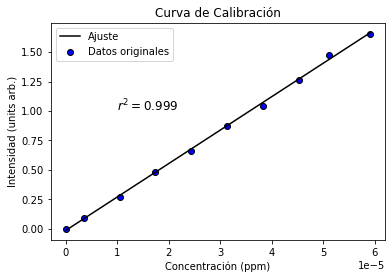

In [281]:
fig, ax= plt.subplots()
ax.scatter(x, y, color='blue', label='Datos originales', edgecolors='black')
ax.plot(np.array(x), np.array(y1_pred), color='k', label='Ajuste')
ax.legend()
ax.set_title("Curva de Calibración")
ax.set_xlabel("Concentración (ppm)")


ax.set_ylabel("Intensidad (units arb.)")
ax.text(0.00001, 1, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="k")
ax.errorbar(x, y, np.array(yerr=Timol_desviacion));

plt.show()
fig.savefig("ccal1.pdf",bbox_inches='tight')

In [ ]:
tabla=pd.DataFrame()

Falta agregar el r^2, agragar la linea y arreglar la gráfica. Arreglar las tablas, juntar los datos

<font color='red' size=6><p style='text-align: justify;'>**Ejercicio 2, Regresión Lineal Multivariado: PLS **

<font color='k' size=4><p style='text-align: justify;'>**Propiedad l, Saturados**

In [48]:
print('A partir de los datos del archivo de excel de información crudos') 

A partir de los datos del archivo de excel de información crudos


In [224]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None)
espectros

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,NaN,NaN,10.000000,10.000000,13.000000,11.000000,11.000000,14.000000,10.000000,14.000000,...,9.000000,13.000000,11.000000,12.000000,13.000000,8.000000,10.000000,9.000000,11.000000,12.000000
1,NaN,NaN,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
2,NaN,NaN,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
3,NaN,NaN,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
4,NaN,NaN,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,NaN,NaN,0.007530,0.003969,0.000003,0.011448,0.003147,0.007675,0.000036,0.000014,...,0.000014,0.008548,0.006177,0.000067,0.000043,0.000535,0.011689,0.011839,0.004210,0.000015
7465,NaN,NaN,0.007522,0.003970,0.000000,0.011453,0.003144,0.007688,0.000037,0.000009,...,0.000013,0.008553,0.006172,0.000068,0.000029,0.000533,0.011687,0.011844,0.004211,0.000013
7466,NaN,NaN,0.007512,0.003973,0.000001,0.011460,0.003142,0.007699,0.000038,0.000005,...,0.000011,0.008556,0.006168,0.000068,0.000017,0.000533,0.011686,0.011849,0.004208,0.000010
7467,NaN,NaN,0.007503,0.003975,0.000006,0.011469,0.003143,0.007707,0.000037,0.000002,...,0.000006,0.008556,0.006164,0.000069,0.000007,0.000534,0.011684,0.011856,0.004203,0.000005


In [2]:
#from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

In [3]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None)  
propiedad_1 = pd.read_excel('./Datos/Informacion Crudos20.xlsx', header=None, usecols=[8], )


Propiedad_2 = propiedad_1.drop([0,1])
Propiedad_2.columns=['Saturados(%w)']
Propiedad_2


,Saturados(%w)
2,31.05
3,36.33
4,34.39
5,29.5
6,30.55
...,...
80,NaN
81,NaN
82,NaN
83,NaN


In [4]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None) 
espectros

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,NaN,NaN,10.000000,10.000000,13.000000,11.000000,11.000000,14.000000,10.000000,14.000000,...,9.000000,13.000000,11.000000,12.000000,13.000000,8.000000,10.000000,9.000000,11.000000,12.000000
1,NaN,NaN,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
2,NaN,NaN,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
3,NaN,NaN,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
4,NaN,NaN,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,NaN,NaN,0.007530,0.003969,0.000003,0.011448,0.003147,0.007675,0.000036,0.000014,...,0.000014,0.008548,0.006177,0.000067,0.000043,0.000535,0.011689,0.011839,0.004210,0.000015
7465,NaN,NaN,0.007522,0.003970,0.000000,0.011453,0.003144,0.007688,0.000037,0.000009,...,0.000013,0.008553,0.006172,0.000068,0.000029,0.000533,0.011687,0.011844,0.004211,0.000013
7466,NaN,NaN,0.007512,0.003973,0.000001,0.011460,0.003142,0.007699,0.000038,0.000005,...,0.000011,0.008556,0.006168,0.000068,0.000017,0.000533,0.011686,0.011849,0.004208,0.000010
7467,NaN,NaN,0.007503,0.003975,0.000006,0.011469,0.003143,0.007707,0.000037,0.000002,...,0.000006,0.008556,0.006164,0.000069,0.000007,0.000534,0.011684,0.011856,0.004203,0.000005


In [5]:
espectros_2 = espectros.transpose()
espectros_2

,0,1,2,3,4,5,6,7,8,9,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
3,10.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
4,13.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8.0,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
80,10.0,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
81,9.0,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
82,11.0,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,0.017274,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [6]:
Doc= Propiedad_2.join(espectros_2, on=None,  how= 'right')
Doc



,Saturados(%w),0,1,2,3,4,5,6,7,8,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31.05,10.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
3,36.33,10.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
4,34.39,13.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,8.0,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
80,NaN,10.0,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
81,NaN,9.0,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
82,NaN,11.0,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [7]:
Doc.dropna(inplace = True)
Doc

,Saturados(%w),0,1,2,3,4,5,6,7,8,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
2,31.05,10.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,...,0.007546,7.545819e-03,0.007545,0.007542,0.007537,7.530447e-03,0.007522,7.512009e-03,0.007503,0.007494
3,36.33,10.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,...,0.003964,3.966483e-03,0.003967,0.003967,0.003967,3.968649e-03,0.003970,3.972981e-03,0.003975,0.003976
4,34.39,13.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,2.548841e-06,0.000000,1.274419e-06,0.000006,0.000013
5,29.5,11.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,1.144849e-02,0.011453,1.145981e-02,0.011469,0.011480
6,30.55,11.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,3.147346e-03,0.003144,3.142148e-03,0.003143,0.003145
7,34,14.0,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,7.675187e-03,0.007688,7.699381e-03,0.007707,0.007711
8,33.1,10.0,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,3.552951e-05,0.000037,3.766993e-05,0.000037,0.000036
9,17.61,14.0,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,1.440320e-05,0.000009,4.938185e-06,0.000002,0.000000
10,22.48,16.0,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,5.131982e-03,0.005135,5.138307e-03,0.005140,0.005141
11,31.21,18.0,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,1.432518e-05,0.000016,1.727454e-05,0.000017,0.000015


In [8]:
data_prop=Doc['Saturados(%w)']
data_prop

2       31.05
3       36.33
4       34.39
5        29.5
6       30.55
7          34
8        33.1
9       17.61
10      22.48
11      31.21
12      29.81
13      30.65
14      31.63
15      22.48
16      26.96
17       34.1
18      34.06
19       23.8
20      32.32
21      30.98
22      31.41
23      31.09
24      32.04
25       32.9
26       21.5
28      28.13
29       34.8
30      31.01
31      33.61
32       30.4
33      29.49
34       29.7
35       29.9
36       21.6
37       34.5
39       32.8
40      32.81
41       24.2
42      33.55
43      13.31
44      22.54
47    47.0428
48    29.1897
49    28.9602
50    35.2241
51    24.0598
52    40.6896
53    44.3265
54    46.6591
55     25.285
56    48.1982
58    47.3812
59    54.0897
60    42.7338
61    38.1509
63    62.2768
64      71.04
65    66.7339
66    42.5745
68    41.8658
Name: Saturados(%w), dtype: object

In [31]:
Doc.drop(['Saturados(%w)'], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
2,10.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,...,0.007546,7.545819e-03,0.007545,0.007542,0.007537,7.530447e-03,0.007522,7.512009e-03,0.007503,0.007494
3,10.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,...,0.003964,3.966483e-03,0.003967,0.003967,0.003967,3.968649e-03,0.003970,3.972981e-03,0.003975,0.003976
4,13.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,2.548841e-06,0.000000,1.274419e-06,0.000006,0.000013
5,11.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,1.144849e-02,0.011453,1.145981e-02,0.011469,0.011480
6,11.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,3.147346e-03,0.003144,3.142148e-03,0.003143,0.003145
7,14.0,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,0.007311,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,7.675187e-03,0.007688,7.699381e-03,0.007707,0.007711
8,10.0,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,0.014046,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,3.552951e-05,0.000037,3.766993e-05,0.000037,0.000036
9,14.0,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,0.029793,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,1.440320e-05,0.000009,4.938185e-06,0.000002,0.000000
10,16.0,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,0.009744,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,5.131982e-03,0.005135,5.138307e-03,0.005140,0.005141
11,18.0,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,0.016107,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,1.432518e-05,0.000016,1.727454e-05,0.000017,0.000015


In [32]:
#from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

In [33]:
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(Doc) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(Doc)# Ahora si, escalo los datos y los normalizo
x_norm = preprocessing.normalize(Doc, norm='l1')# Normaliza los datos
x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos

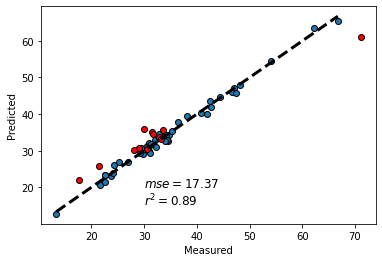

MSE = 17.37


In [34]:
# Separación de los datos en set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, data_prop, train_size=0.8, random_state=4, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(30,20, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(30,15, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

<font color='k' size=4><p style='text-align: justify;'>**Propiedad ll, Aromáticos**

In [40]:
Aromaticos = pd.read_excel('./Datos/Informacion Crudos20.xlsx', header=None, usecols=[9], nrows=66)
Aromaticos 

,9
0,NaN
1,Aromaticos(%w)
2,29.15
3,32.42
4,39.84
...,...
61,40.93
62,NaN
63,29.75
64,24.78


In [41]:
Propiedad_3 = Aromaticos.drop([0,1])
Propiedad_3.columns=['Aromaticos(%w)']
Propiedad_3

,Aromaticos(%w)
2,29.15
3,32.42
4,39.84
5,26
6,26.04
...,...
61,40.93
62,NaN
63,29.75
64,24.78


In [42]:
Doc2= Propiedad_3.join(espectros_2, on=None,  how= 'right')
Doc2

,Aromaticos(%w),0,1,2,3,4,5,6,7,8,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29.15,10.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
3,32.42,10.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
4,39.84,13.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,8.0,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
80,NaN,10.0,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
81,NaN,9.0,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
82,NaN,11.0,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [43]:
Doc2.dropna(inplace = True)
Doc2

,Aromaticos(%w),0,1,2,3,4,5,6,7,8,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
2,29.15,10.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,...,0.007546,7.545819e-03,0.007545,0.007542,0.007537,7.530447e-03,0.007522,7.512009e-03,0.007503,0.007494
3,32.42,10.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,...,0.003964,3.966483e-03,0.003967,0.003967,0.003967,3.968649e-03,0.003970,3.972981e-03,0.003975,0.003976
4,39.84,13.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,2.548841e-06,0.000000,1.274419e-06,0.000006,0.000013
5,26,11.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,1.144849e-02,0.011453,1.145981e-02,0.011469,0.011480
6,26.04,11.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,3.147346e-03,0.003144,3.142148e-03,0.003143,0.003145
7,34,14.0,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,7.675187e-03,0.007688,7.699381e-03,0.007707,0.007711
8,30.3,10.0,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,3.552951e-05,0.000037,3.766993e-05,0.000037,0.000036
9,25.16,14.0,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,1.440320e-05,0.000009,4.938185e-06,0.000002,0.000000
10,8.13,16.0,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,5.131982e-03,0.005135,5.138307e-03,0.005140,0.005141
11,32.9,18.0,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,1.432518e-05,0.000016,1.727454e-05,0.000017,0.000015


In [44]:
data_prop2=Doc2['Aromaticos(%w)']
data_prop2

2     29.15
3     32.42
4     39.84
5        26
6     26.04
7        34
8      30.3
9     25.16
10     8.13
11     32.9
12    28.54
13    25.74
14    28.97
15     8.13
16     9.29
17    27.62
18    31.36
19      8.3
20    29.78
21    30.41
22    29.01
23    29.18
24     28.1
25     28.1
26     36.9
28    30.78
29     15.8
30    35.66
31    28.57
32     22.7
33    29.65
34     30.8
35     31.5
36     29.5
37      9.4
39     26.3
40    28.18
41     36.9
42    33.45
43    41.42
44    41.16
47    34.52
48    45.31
49    50.76
50    43.37
51    48.54
52    37.35
53    37.83
54    35.39
55     50.5
56    37.98
58    34.58
59    39.01
60    18.66
61    40.93
63    29.75
64    24.78
65    28.16
Name: Aromaticos(%w), dtype: object

In [45]:
Doc2.drop(['Aromaticos(%w)'], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
2,10.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,...,0.007546,7.545819e-03,0.007545,0.007542,0.007537,7.530447e-03,0.007522,7.512009e-03,0.007503,0.007494
3,10.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,...,0.003964,3.966483e-03,0.003967,0.003967,0.003967,3.968649e-03,0.003970,3.972981e-03,0.003975,0.003976
4,13.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,2.548841e-06,0.000000,1.274419e-06,0.000006,0.000013
5,11.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,1.144849e-02,0.011453,1.145981e-02,0.011469,0.011480
6,11.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,3.147346e-03,0.003144,3.142148e-03,0.003143,0.003145
7,14.0,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,0.007311,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,7.675187e-03,0.007688,7.699381e-03,0.007707,0.007711
8,10.0,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,0.014046,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,3.552951e-05,0.000037,3.766993e-05,0.000037,0.000036
9,14.0,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,0.029793,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,1.440320e-05,0.000009,4.938185e-06,0.000002,0.000000
10,16.0,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,0.009744,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,5.131982e-03,0.005135,5.138307e-03,0.005140,0.005141
11,18.0,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,0.016107,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,1.432518e-05,0.000016,1.727454e-05,0.000017,0.000015


In [46]:
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(Doc2) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(Doc2)# Ahora si, escalo los datos y los normalizo
x_norm = preprocessing.normalize(Doc2, norm='l1')# Normaliza los datos
x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos

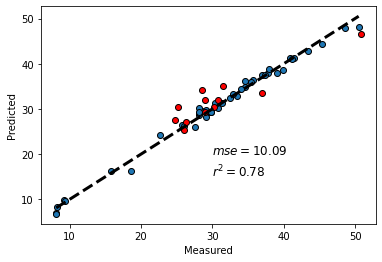

MSE = 10.09


In [47]:
# Separación de los datos en set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, data_prop2, train_size=0.8, random_state=4, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(30,20, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(30,15, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))